In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### importing datasets

In [2]:
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

## Categorical Plots

### Categorical Scatter Plot
In normal scatter plot, there is two numerical column but here there is only one.
- Stripplot
- Swarmplot

### Categorical Distribution Plots
These plots show the distribution (spread, shape, and variability) of a numerical variable across different categories. They help you understand how values vary within and between groups.

- Boxplot
- Violinplot

### Categorical Estimate Plot -> for central tendency
Categorical estimate plots show summary statistics (like mean or confidence intervals) of a numerical variable across categories.

- Barplot
- Pointplot
- Countplot

**Figure level function** -> `catplot`

## Categorical Scatter Plot
### 1. Strip Plot 
→ Scatter with optional jitter to avoid overlap.

→ Best for small datasets.

<Axes: xlabel='day', ylabel='total_bill'>

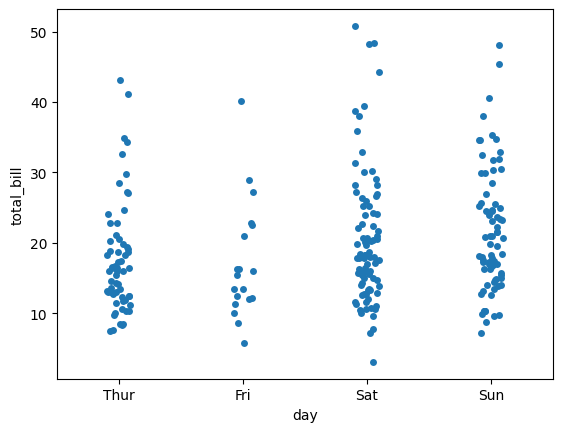

In [3]:
sns.stripplot(data=tips,x="day",y="total_bill")

#### Jitter parameter
* jitter is a parameter that adds a small random noise to the position of data points along the categorical axis (usually the x-axis).
* This is helpful because:
    - Without jitter, many data points may overlap if they have the same y-value, making the plot misleading or unreadable.
    - With jitter, those overlapping dots are slightly spread out horizontally, so you can see the actual number of points.

<Axes: xlabel='day', ylabel='total_bill'>

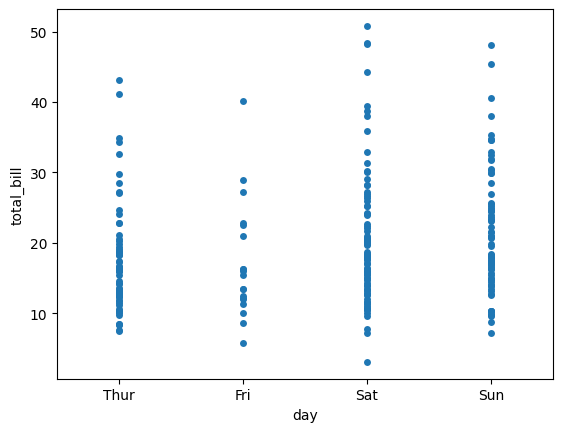

In [4]:
sns.stripplot(data=tips,x="day",y="total_bill",jitter=False)

**can also pass numerical values in jitter parameter**

<Axes: xlabel='day', ylabel='total_bill'>

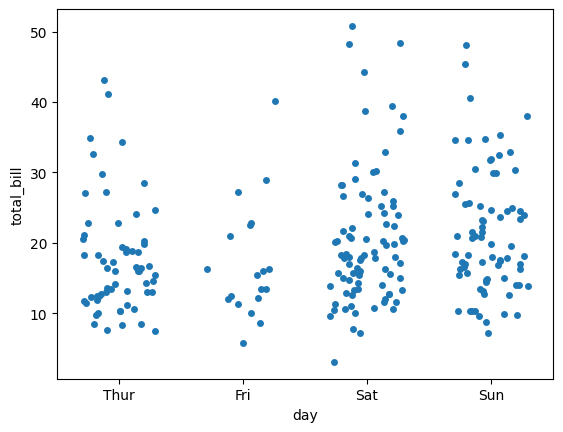

In [5]:
sns.stripplot(data=tips,x="day",y="total_bill",jitter=0.3)

#### Figure level function

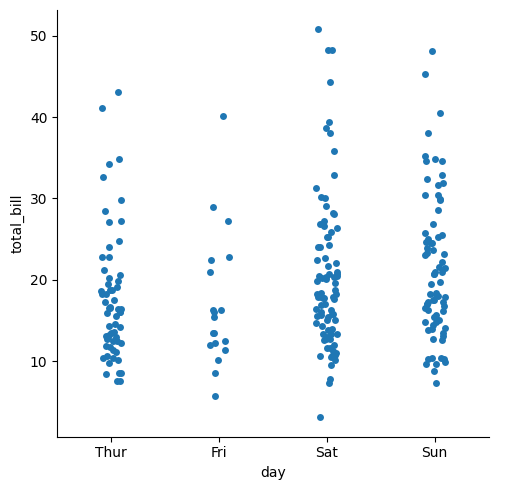

In [6]:
sns.catplot(data=tips,x="day",y="total_bill",kind="strip")

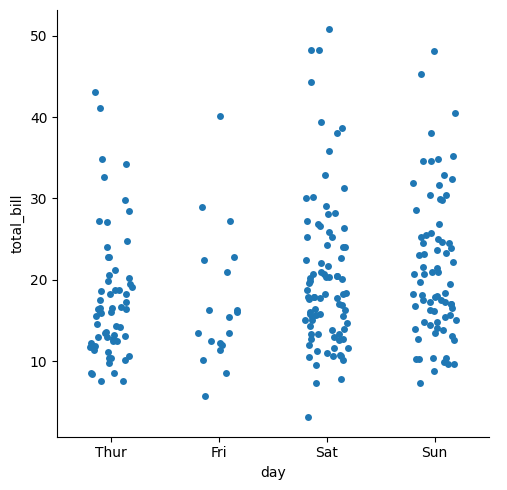

In [7]:
# using jitter
sns.catplot(data=tips,x="day",y="total_bill",kind="strip",jitter=0.2)

#### hue parameter

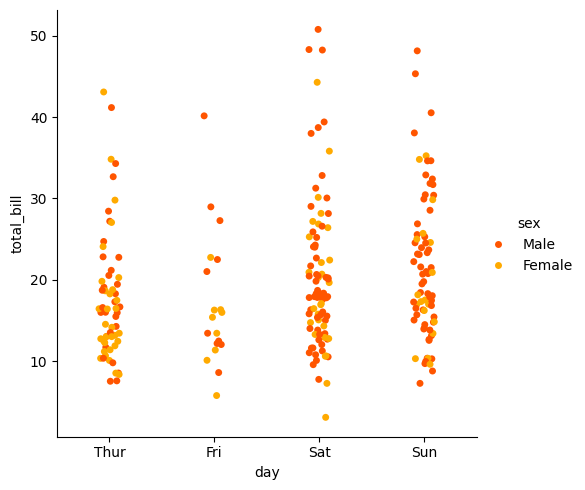

In [8]:
sns.catplot(data=tips,x="day",y="total_bill",kind="strip",hue="sex",palette="autumn")

### 2. Swarn Plot
A swarm plot is a categorical scatter plot like stripplot, but with a key improvement:

👉 It automatically adjusts the position of the data points so they don’t overlap — even without using jitter.

✅ **Key Features:**
* Shows all individual data points.
* Points are tightly packed and non-overlapping.
* Great for showing distribution and clustering.
* Best for small to medium-sized datasets.
* Not good for bigger datasets.

<Axes: xlabel='day', ylabel='total_bill'>

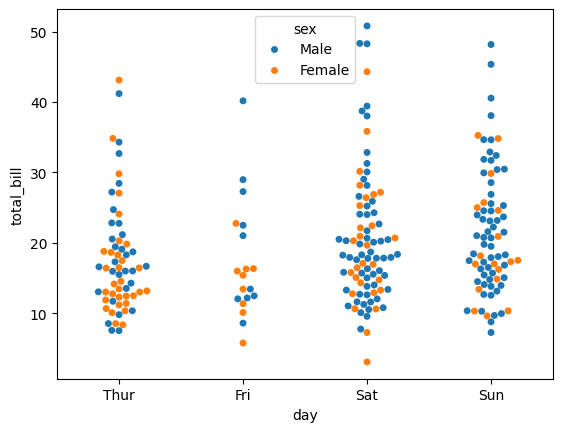

In [9]:
sns.swarmplot(data=tips,x="day",y="total_bill",hue="sex")

#### Figure Level Function

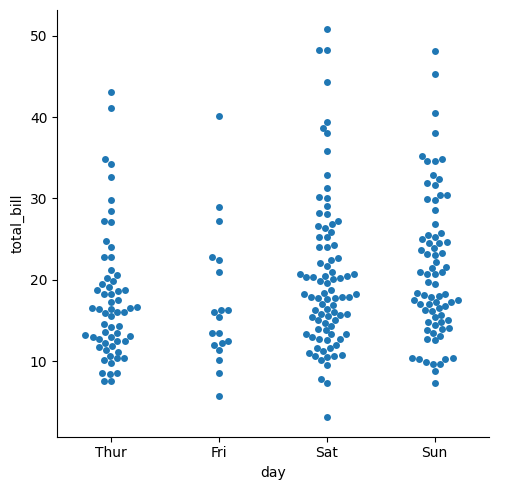

In [10]:
sns.catplot(data=tips,x="day",y="total_bill",kind="swarm")

## Categorical Distribution Plots
### 1. Box Plot
A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”). It can tell you about your outliers and what their values are. Boxplots can also tell you if your data is symmetrical, how tightly your data is grouped and if and how your data is skewed.
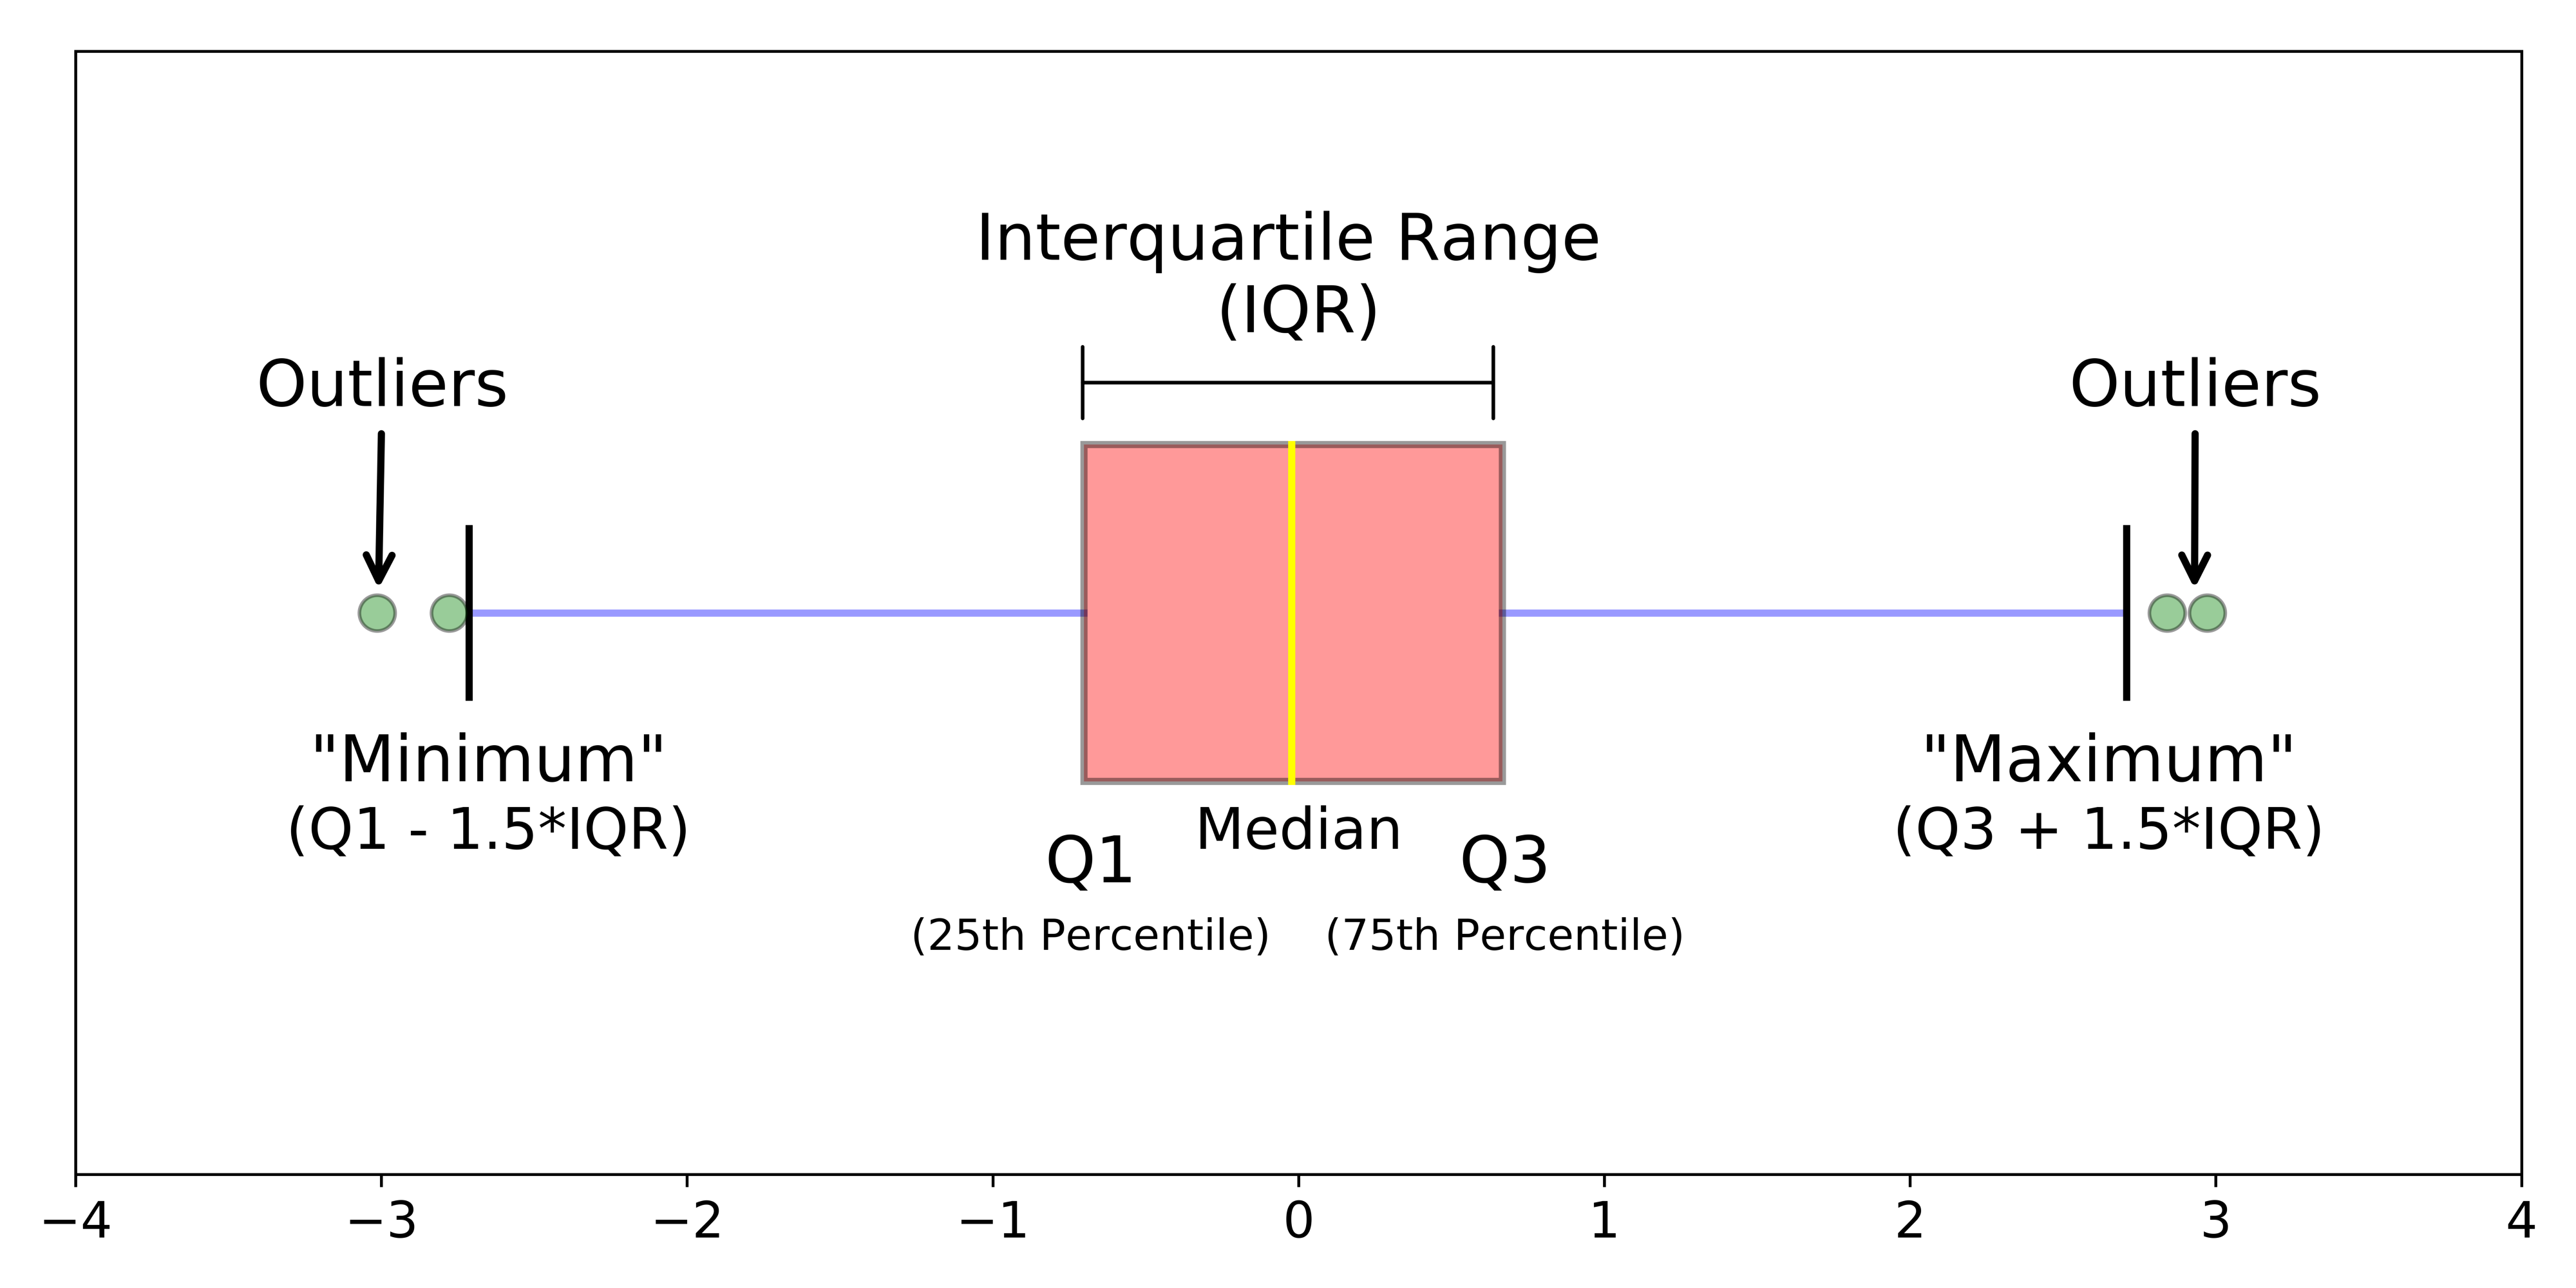
**What it displays:**
* Median (central line)
* 25th and 75th percentiles (box)
* Whiskers (range excluding outliers)
* Outliers (as dots) -->*An outlier is a data point that is significantly different from other observations in a dataset. It lies far away from the majority of the data.*

$IQR = Q3 − Q1$

$Lower whisker = Q1 − 1.5 × IQR$

$Upper whisker = Q3 + 1.5 × IQR$

#### Univariate Box Plot

<Axes: ylabel='total_bill'>

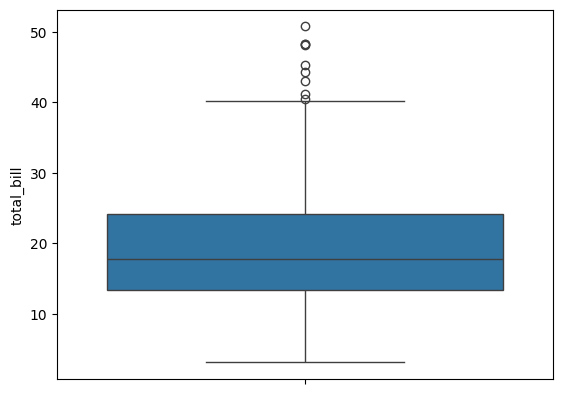

In [11]:
sns.boxplot(data=tips,y="total_bill")

#### Bivariate Box Plot

<Axes: xlabel='sex', ylabel='total_bill'>

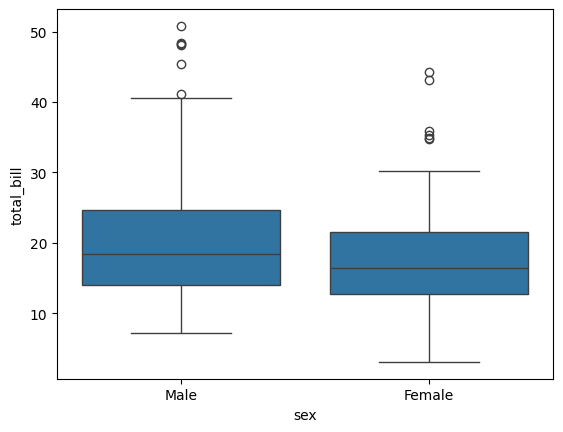

In [12]:
sns.boxplot(data=tips,x="sex",y="total_bill")

<Axes: xlabel='day', ylabel='total_bill'>

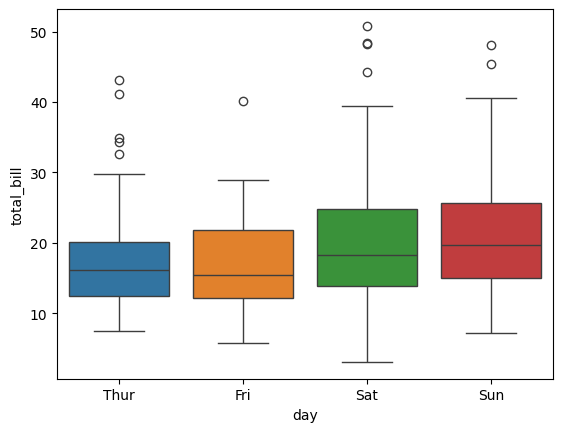

In [13]:
sns.boxplot(data=tips,x="day",y="total_bill",hue="day")

#### Figure Level Function

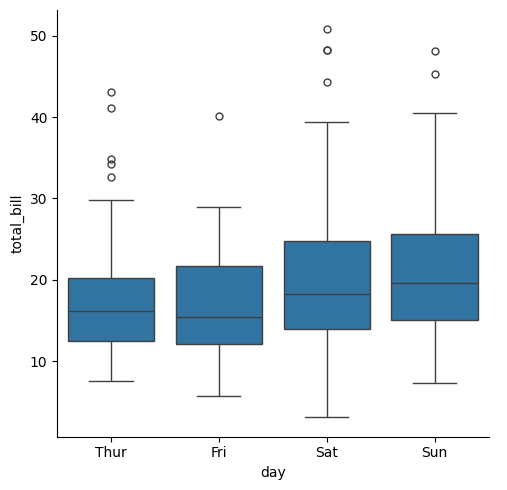

In [14]:
sns.catplot(data=tips,x="day",y="total_bill",kind="box")

#### hue parameter

<Axes: xlabel='day', ylabel='total_bill'>

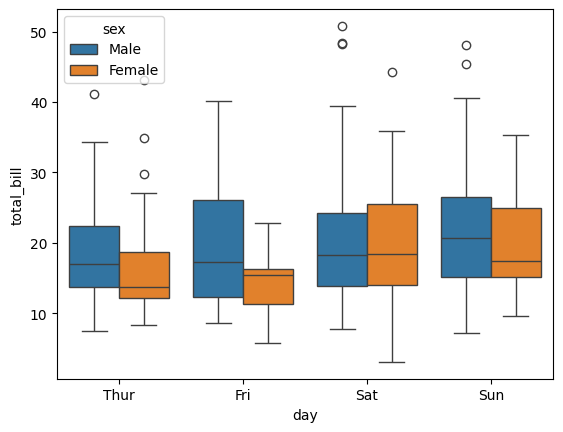

In [15]:
sns.boxplot(data=tips,x="day",y="total_bill",hue="sex")

### 2. Violin Plot = Box Plot + KDE Plot

A violin plot is a combination of:
* A boxplot (for summary statistics)
* A KDE plot (for distribution shape)

**It shows both the summary and the full distribution of a numeric variable across categories.**

<Axes: xlabel='day', ylabel='total_bill'>

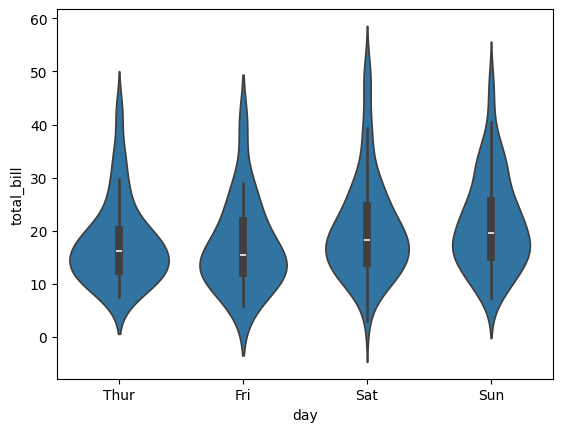

In [16]:
sns.violinplot(data=tips,x="day",y="total_bill")

#### Figure Level Function

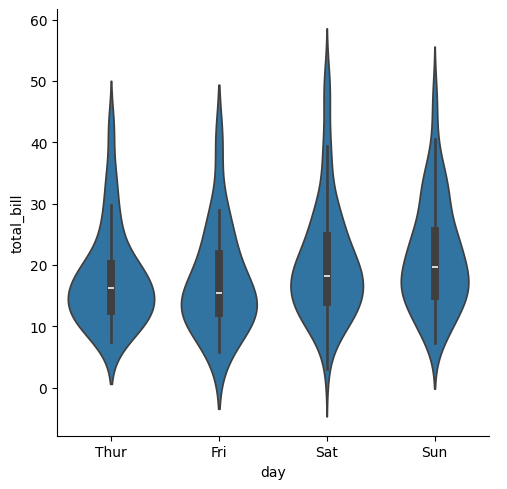

In [17]:
sns.catplot(kind="violin",data=tips,x="day",y="total_bill")

#### hue parameter

<Axes: xlabel='day', ylabel='total_bill'>

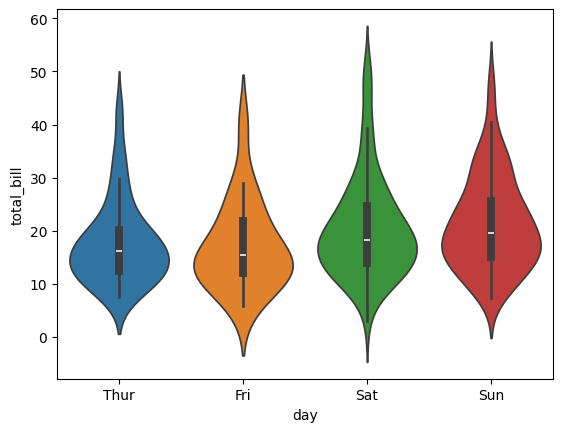

In [18]:
sns.violinplot(data=tips,x="day",y="total_bill",hue="day")

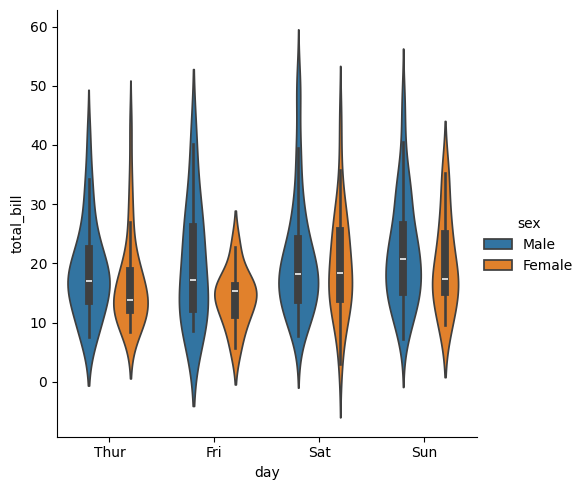

In [19]:
sns.catplot(kind="violin",data=tips,x="day",y="total_bill",hue="sex")

#### split parameter
The split parameter is used when you have a hue variable and want to draw two violins side by side inside one category — rather than drawing them separately.

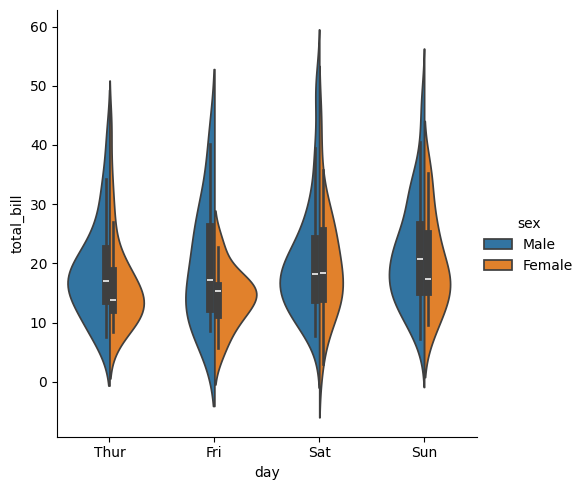

In [20]:
sns.catplot(kind="violin",data=tips,x="day",y="total_bill",hue="sex",split=True)

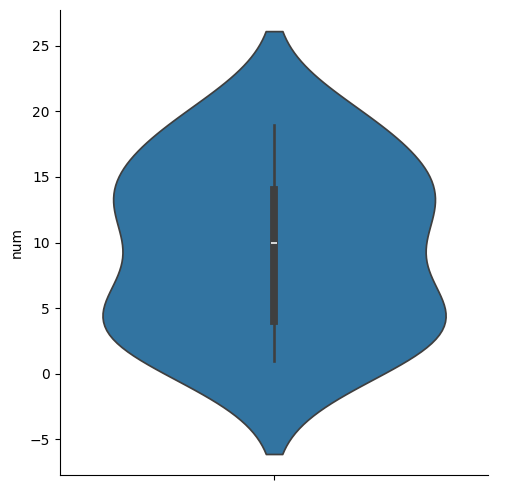

In [21]:
students = pd.DataFrame({
    "num":[10,12,13,13,14,15,7,5,6,4,2,19,19,18,1,2,3],
})
sns.catplot(kind="violin",data=students,y="num")

## Categorical Estimate Plot
### 1. Bar Plot
Shows mean (by default) of a numerical variable for each category, with confidence intervals (CI).

<Axes: xlabel='sex', ylabel='total_bill'>

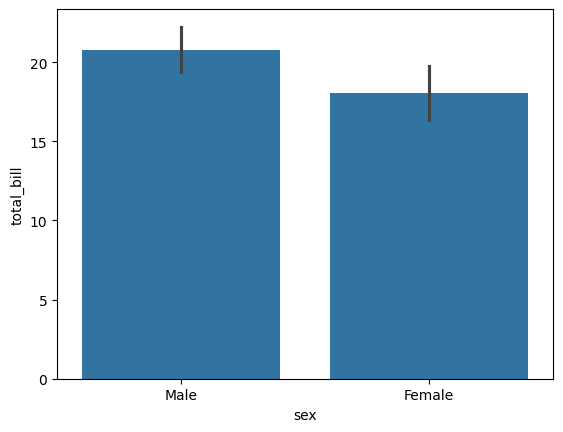

In [22]:
sns.barplot(data=tips,x="sex",y="total_bill")

#### Figure Level Function

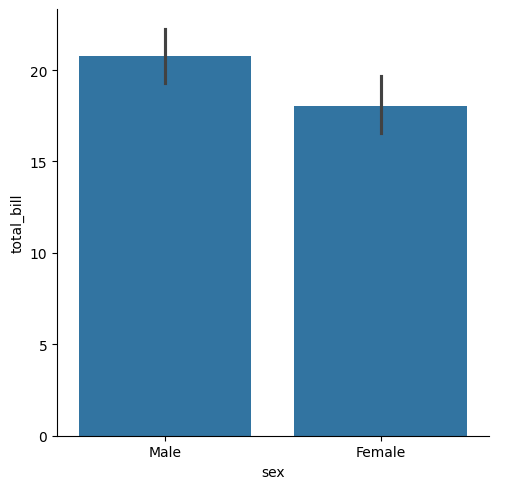

In [23]:
sns.catplot(kind="bar",data=tips,x="sex",y="total_bill")

**When there are multiple observations in each category, it also uses bootstrapping(statistical technique) to compute a confidence interval(statistical matrix) around the estimate, which is plotted using error bars.**

***What Error Bars Show in barplot()?***

By default:
* Bar height = mean of the data for that category
* Error bar = 95% confidence interval (CI) for the mean

**A *Confidence Interval (CI)* is a range of values that is likely to contain the true value of a population parameter (like the mean), with a certain level of confidence.**

**Example:**

Suppose we calculate the average height of 100 students and get:

$Mean height = 160 cm$

95% CI = [157 cm, 163 cm]

<Axes: xlabel='sex', ylabel='total_bill'>

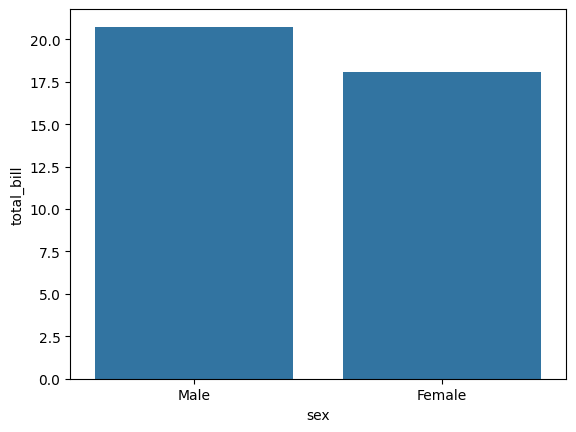

In [24]:
sns.barplot(data=tips,x="sex",y="total_bill",errorbar=None)

#### hue parameter

<Axes: xlabel='sex', ylabel='total_bill'>

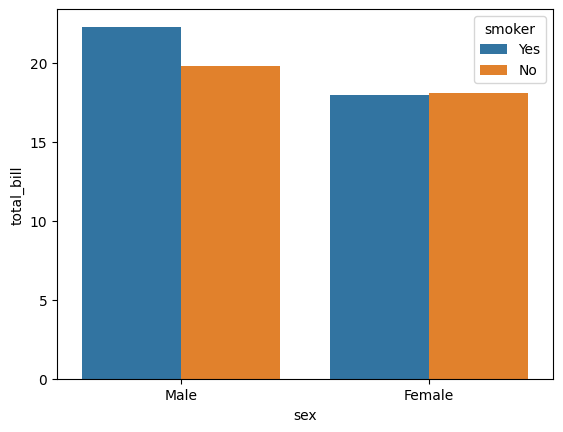

In [25]:
sns.barplot(data=tips,x="sex",y="total_bill",hue="smoker",errorbar=None)

<Axes: xlabel='sex', ylabel='total_bill'>

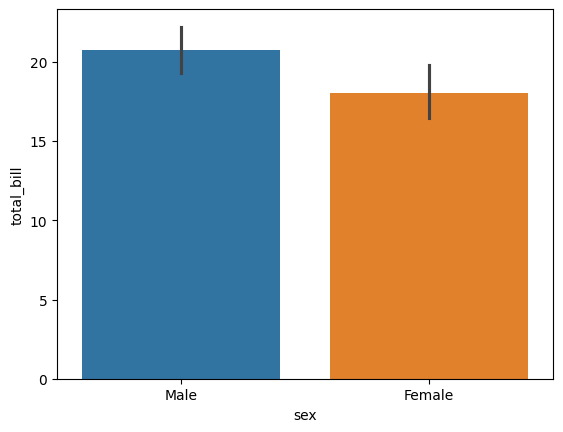

In [26]:
sns.barplot(data=tips,x="sex",y="total_bill",hue="sex")

#### estimator paramter
n Seaborn's barplot(), the **estimator** parameter controls which statistical function is applied to the data values within each category on the x-axis.

**Some common estimator functions:**
| Estimator           | Meaning                   |
| ------------------- | ------------------------- |
| `np.mean` (default) | Mean (average) of values  |
| `np.median`         | Median of values          |
| `len`               | Count (number of entries) |
| `np.max`            | Maximum value             |
| `np.min`            | Minimum value             |
| `np.sum`            | Sum of values             |


<Axes: xlabel='sex', ylabel='total_bill'>

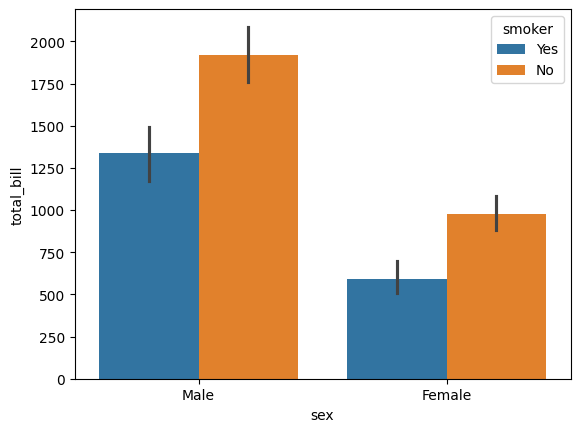

In [27]:
sns.barplot(data=tips,x="sex",y="total_bill",hue="smoker",estimator=np.sum)

<Axes: xlabel='sex', ylabel='total_bill'>

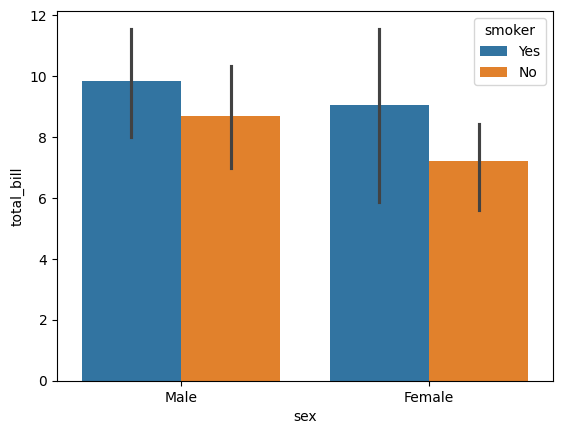

In [28]:
sns.barplot(data=tips,x="sex",y="total_bill",hue="smoker",estimator=np.std)

<Axes: xlabel='sex', ylabel='total_bill'>

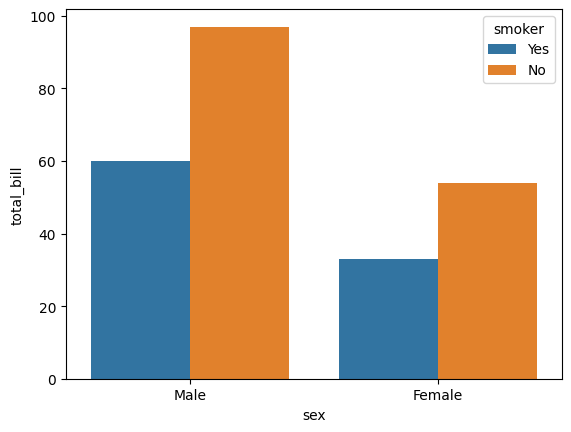

In [29]:
sns.barplot(data=tips,x="sex",y="total_bill",hue="smoker",estimator=len)

<Axes: xlabel='sex', ylabel='total_bill'>

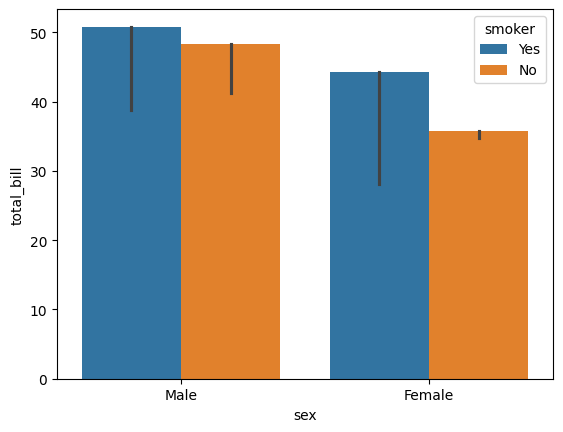

In [30]:
sns.barplot(data=tips,x="sex",y="total_bill",hue="smoker",estimator=np.max)

### 2. Point Plot

A point plot in Seaborn is used to show the mean (or another estimator) of a quantitative variable for different levels of a categorical variable, with error bars to show variability.

<Axes: xlabel='sex', ylabel='total_bill'>

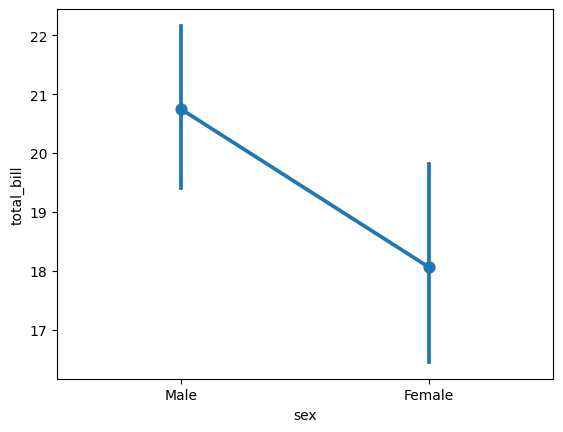

In [31]:
sns.pointplot(data=tips,x="sex",y="total_bill")

<Axes: xlabel='sex', ylabel='total_bill'>

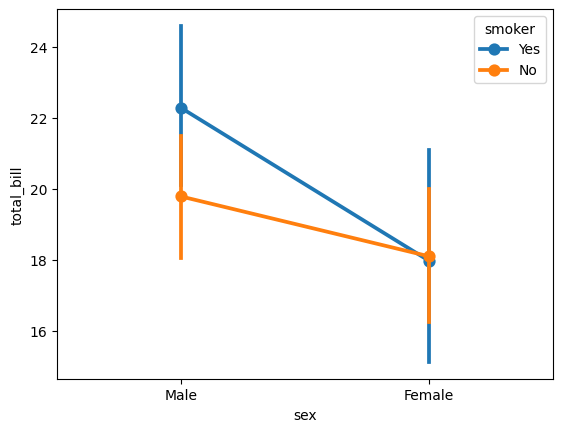

In [32]:
sns.pointplot(data=tips,x="sex",y="total_bill",hue="smoker")

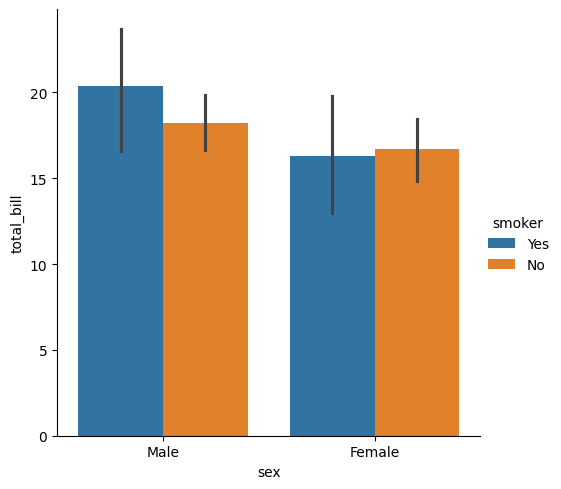

In [33]:
sns.catplot(kind="bar",data=tips,x="sex",y="total_bill",hue="smoker",estimator=np.median)

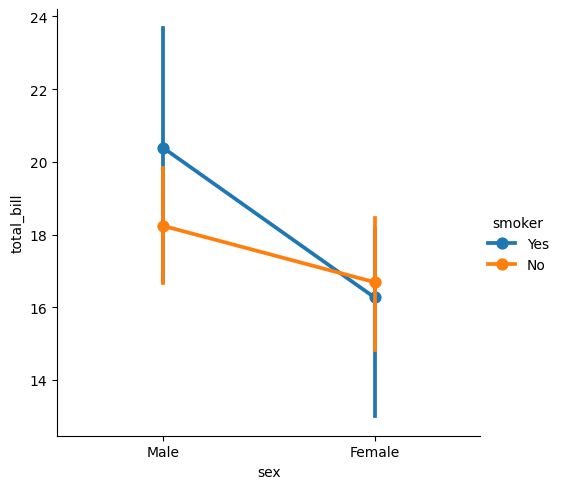

In [34]:
sns.catplot(kind="point",data=tips,x="sex",y="total_bill",hue="smoker",estimator=np.median)

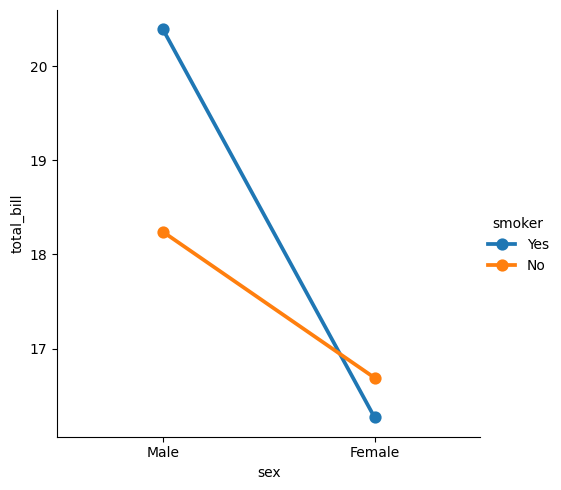

In [35]:
sns.catplot(kind="point",data=tips,x="sex",y="total_bill",hue="smoker",estimator=np.median,errorbar=None)

### 3.Count Plot

A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative variable.

In [36]:
tips["sex"].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

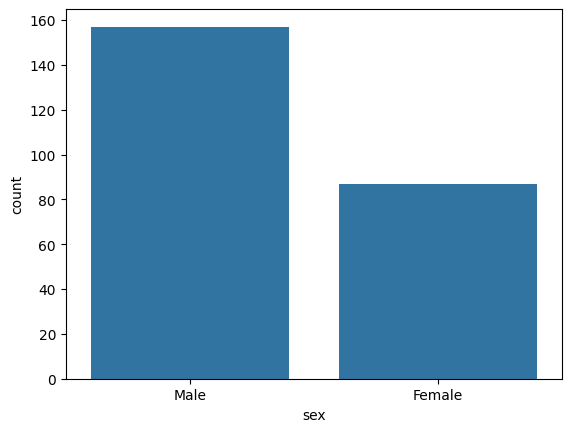

In [37]:
sns.countplot(data=tips,x="sex")

#### hue parameter

In [38]:
tips.pivot_table(columns="sex",index="day",aggfunc="count",values="total_bill")
# well result would be same if choose even anything in values

C:\Users\AK\AppData\Local\Temp\ipykernel_5104\2738359570.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tips.pivot_table(columns="sex",index="day",aggfunc="count",values="total_bill")


sex,Male,Female
day,,
Thur,30,32
Fri,10,9
Sat,59,28
Sun,58,18


<Axes: xlabel='sex', ylabel='count'>

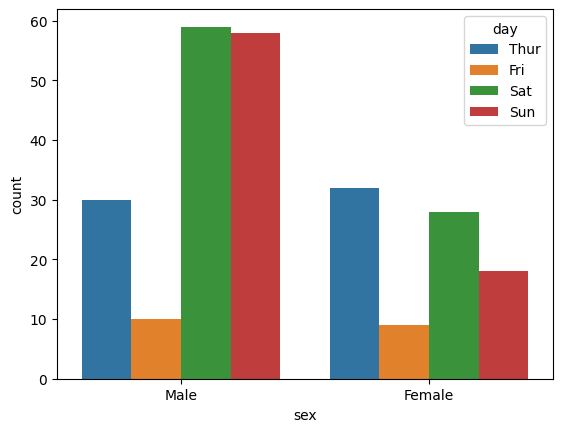

In [39]:
sns.countplot(data=tips,x="sex",hue="day")

### Faceting using catplot

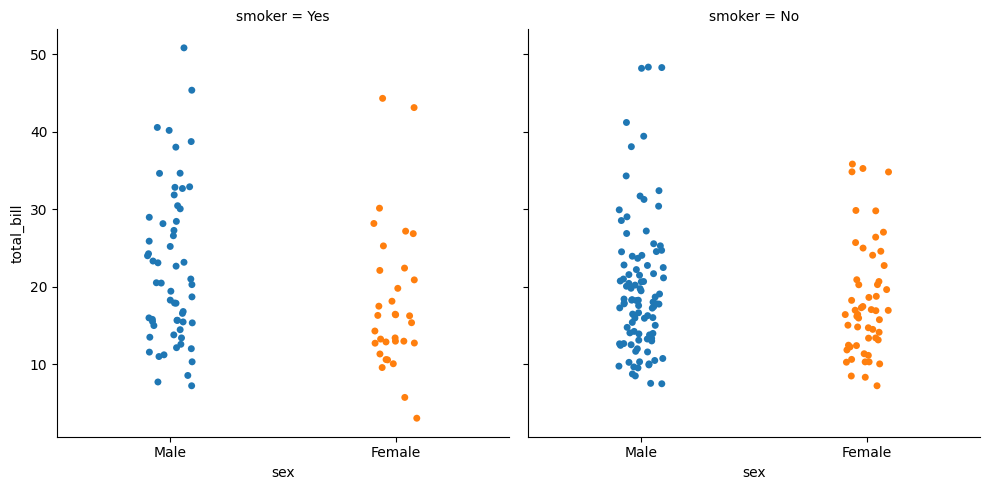

In [40]:
sns.catplot(data=tips,x="sex",y="total_bill",kind="strip",col="smoker",hue="sex")

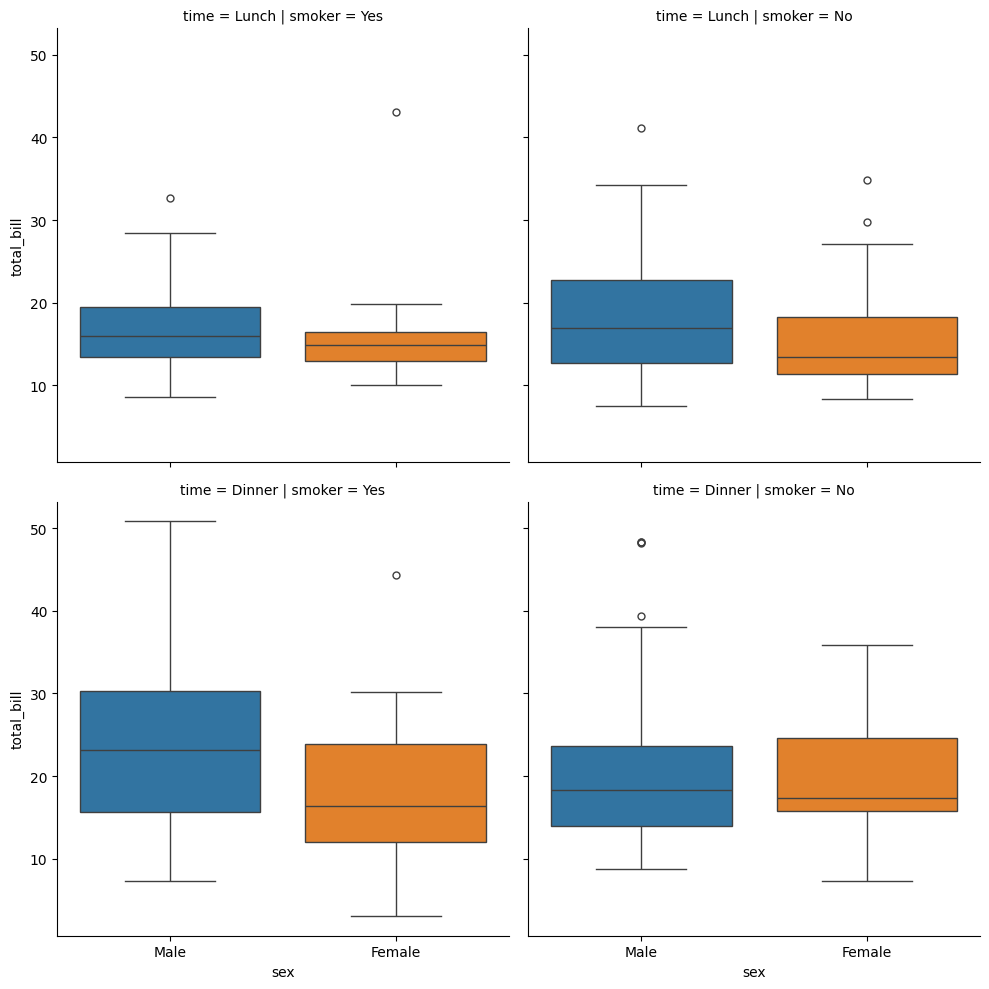

In [41]:
sns.catplot(data=tips,x="sex",y="total_bill",kind="box",col="smoker",hue="sex",row="time")

## Regression Plots

### What is Regression?
Regression is a statistical method used to model the relationship between a dependent variable (target) and one or more independent variables (features).
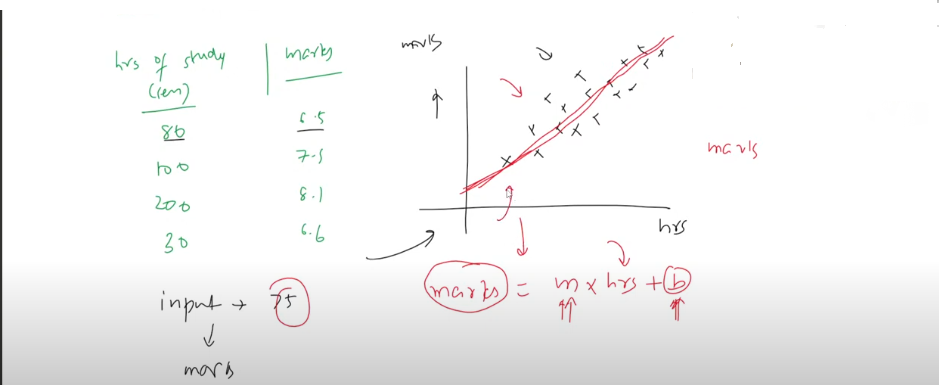

#### Example:
Suppose you're a restaurant manager and want to predict the tip a customer will give based on their total bill.

Here:
* Independent variable (X) = total_bill
* Dependent variable (Y) = tip
* A regression line would show how the tip generally increases with the bill.

### Types of Regression

| Type                      | Description                                  |
| ------------------------- | -------------------------------------------- |
| **Linear Regression**     | Fits a straight line (e.g. `Y = aX + b`)     |
| **Polynomial Regression** | Fits a curved line (e.g. `Y = aX² + bX + c`) |
| **Multiple Regression**   | More than one independent variable           |

#### 🧠 Real-life Uses:
* Predicting house prices based on size, location, etc.
* Estimating student grades based on study hours.
* Forecasting sales or profits.


### 1. regplot
regplot() is a Seaborn function used to plot data points along with a regression line. It is ideal when you want to visualize the linear relationship between two continuous variables.


<Axes: xlabel='total_bill', ylabel='tip'>

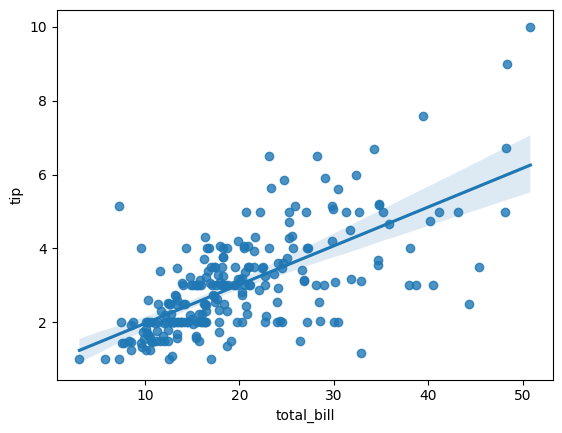

In [42]:
#axes level function
sns.regplot(data=tips,x="total_bill",y="tip")

* In the simplest invocation, both functions draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression.
* ***The shaded area represents the range of uncertainty in the estimate of the regression line.***

By default, it's a 95% confidence interval, meaning:

    **“We are 95% confident that the true regression line lies within this shaded area.”**

### 2. sns.lmplot() --> Figure Level Function
The lmplot() in Seaborn is a high-level, figure-level function for drawing linear regression models.
It will:
* Fit a linear regression line between total_bill and tip
* Plot scatter points
* Add a confidence interval (shaded region)

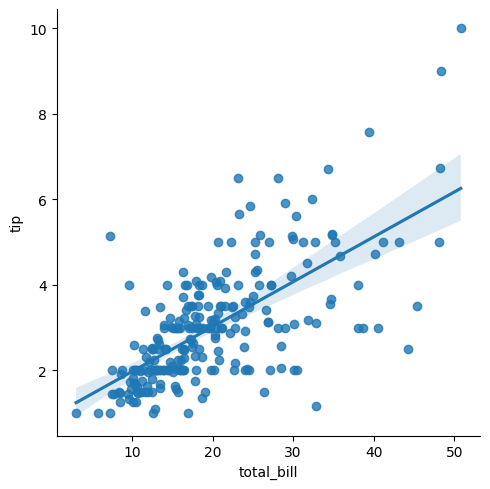

In [43]:
sns.lmplot(data=tips,x="total_bill",y="tip")

#### hue parameter isn't in regplot()

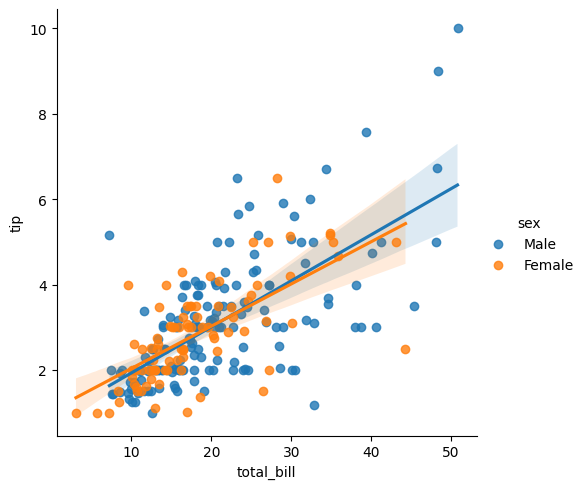

In [44]:
sns.lmplot(data=tips,x="total_bill",y="tip",hue="sex")

### 3. residplot()
residplot() visualizes residuals of a regression — the difference between actual and predicted values.
#### What are Residuals?
In regression, the residual for each point is:

$residual = actual − predicted$

It tells you how far off your model's prediction is from the actual value.

<Axes: xlabel='total_bill', ylabel='tip'>

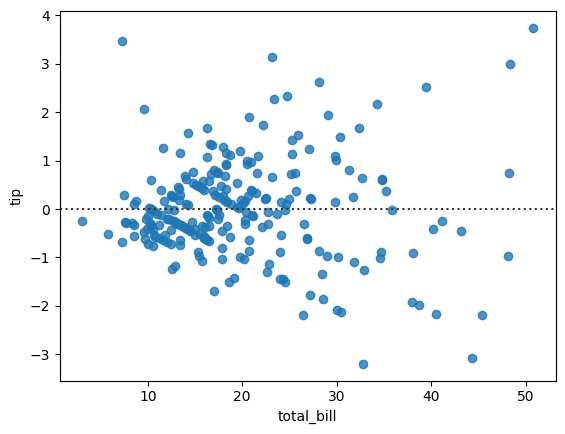

In [45]:
sns.residplot(data=tips,x="total_bill",y="tip")

## Multigrid Plots
1. FacetGrid
2. PairGrid
3. JoinGrid

## 1. Facetgrid
A second way to plot Facet plots -> FacetGrid
### Why use FacetGrid:
* More flexiable.
* If someone has used this way, so would know about it.
* Custom plotting with .map().
* Base class.
* Figure-level Functions (catplot, etc.) Built on FacetGrid.

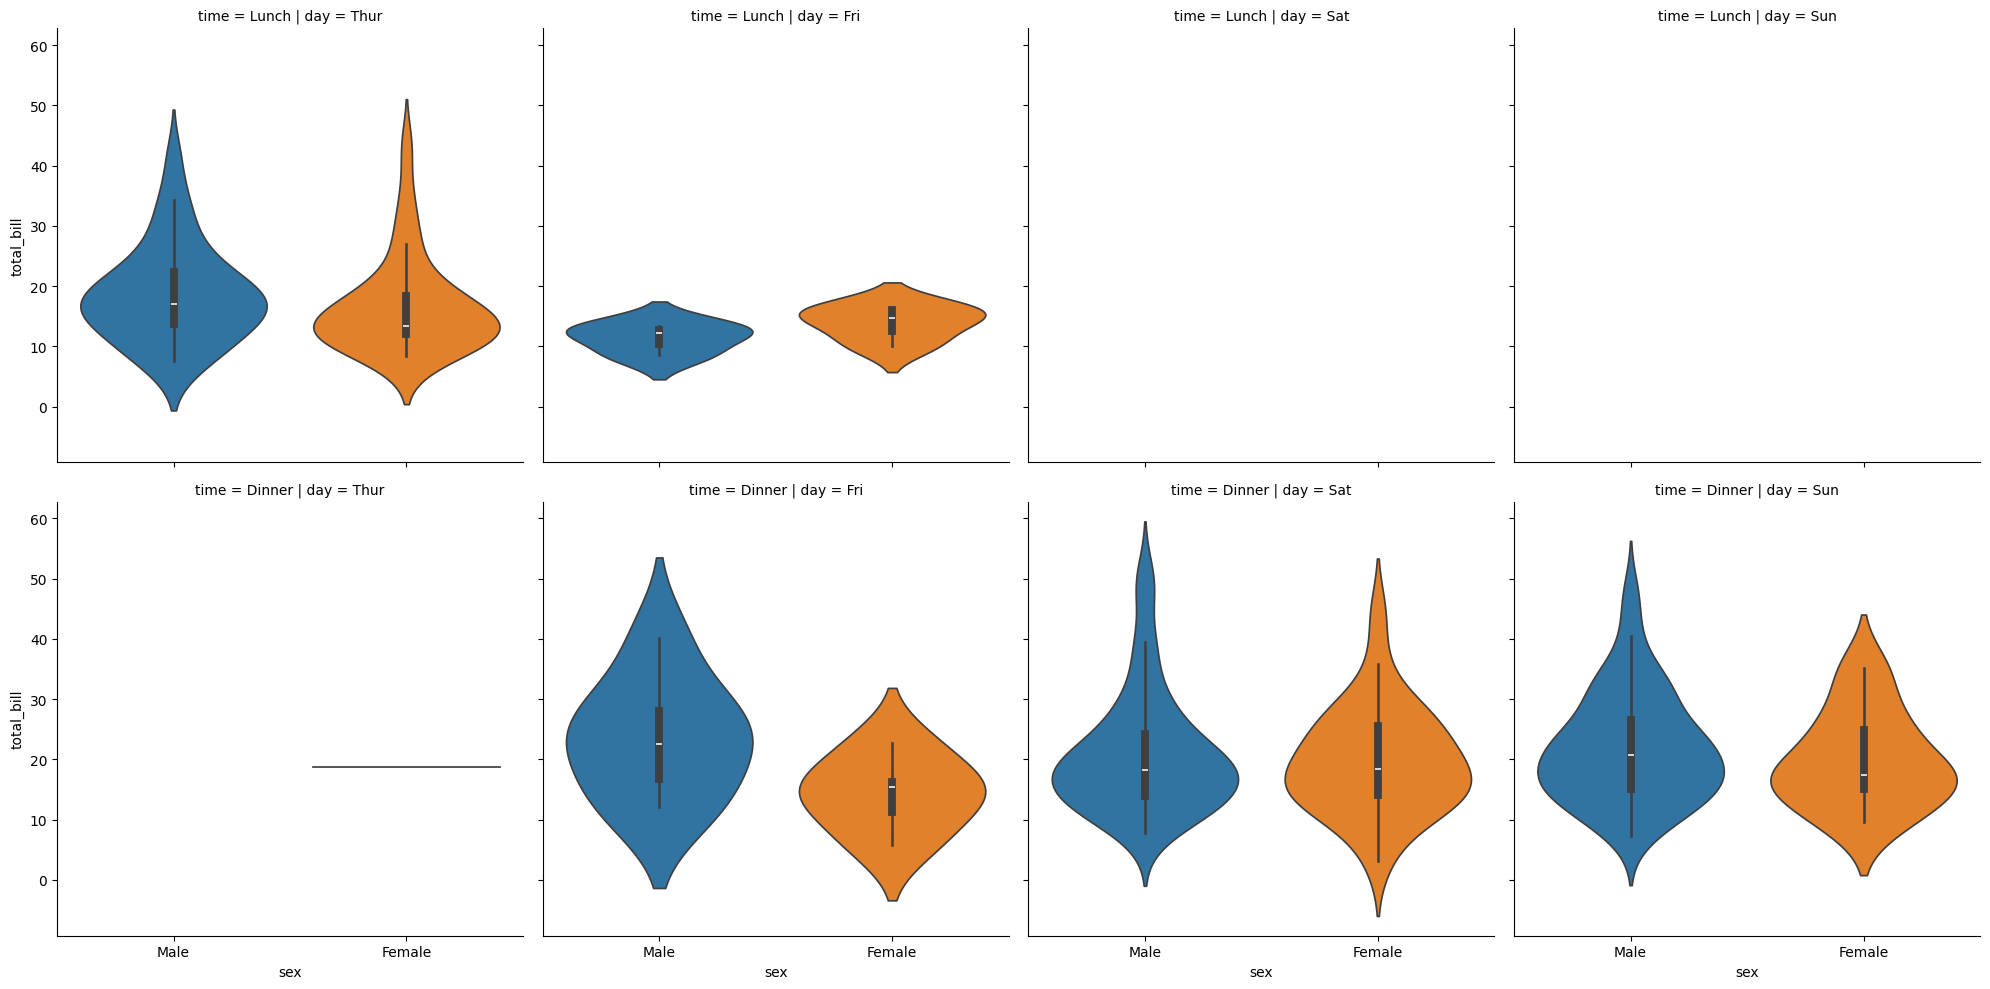

In [67]:
# figure level functions
# 1. displot
# 2. catplot
# 3. lmplot
# 4. relplot
sns.catplot(data=tips,x="sex",y="total_bill",kind="violin",hue="sex",col="day",row="time")

***Now, plotting this graph using FacetGrid***

C:\Users\AK\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


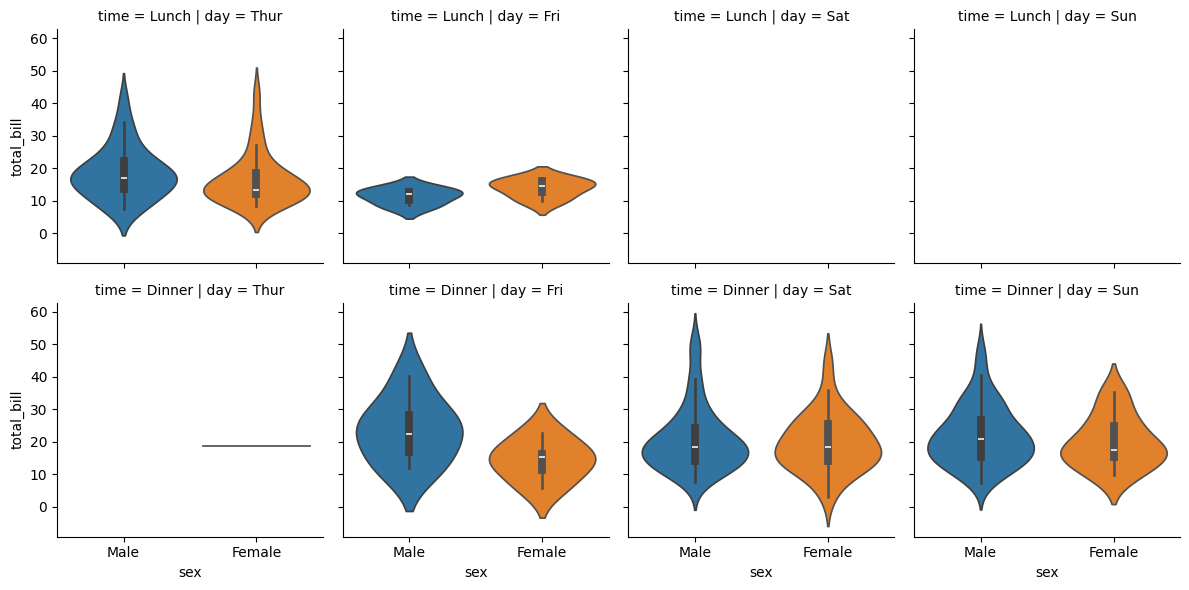

In [64]:
g = sns.FacetGrid(tips,col="day",row="time",hue="sex")#makes empty grids
g.map(sns.violinplot,"sex","total_bill")

#### g.add_legend()

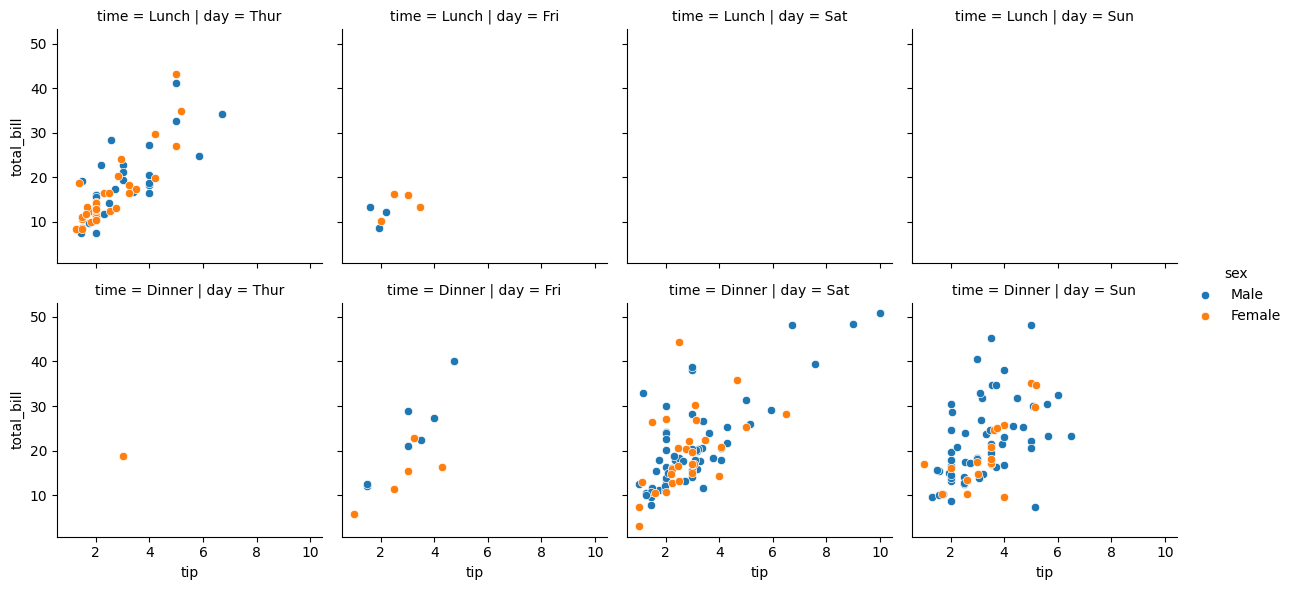

In [69]:
g = sns.FacetGrid(tips,col="day",row="time",hue="sex")
g.map(sns.scatterplot,"tip","total_bill")
g.add_legend()

## Plotting Pairwise Relationship(Pairplot vs Pair Grid)
### pairplot vs PairGrid in Seaborn
Both are used for visualizing pairwise relationships in a dataset. Here's how they differ:

#### 🔸 pairplot
* High-level function (easy to use).
* Automatically creates a matrix of plots showing pairwise relationships between numeric columns.
* Good for quick exploration of the data.
* You can add hue, kind, diag_kind, etc.

#### 🔸 PairGrid
* Low-level, customizable class.
* Gives you full control over what kind of plot goes in each part of the grid (diag, upper, lower).
* You have to specify plotting functions manually.

In [71]:
#using iris
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


* **In pairplot, when there is two same columns then it will plot histogram**
* **The upper side of diagonal and lower side of diagonal are symmeterical only need to see one.**

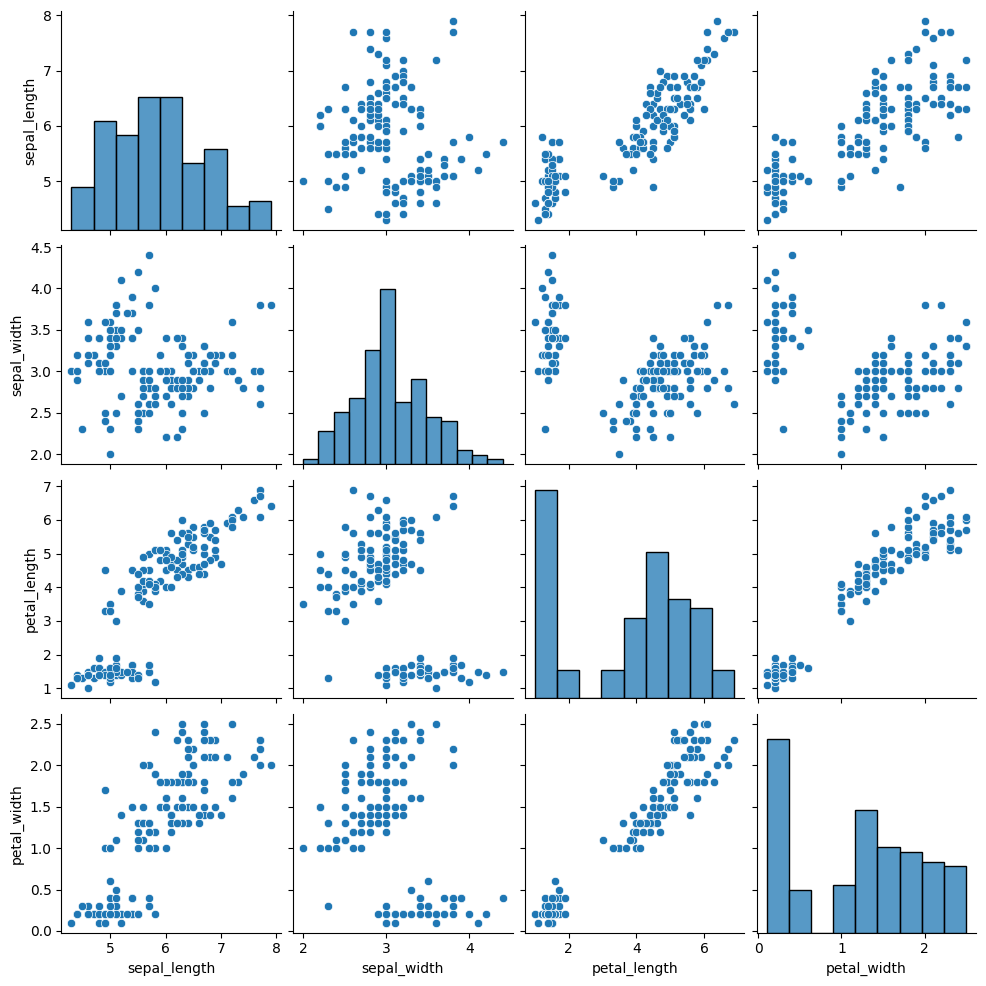

In [73]:
sns.pairplot(iris)

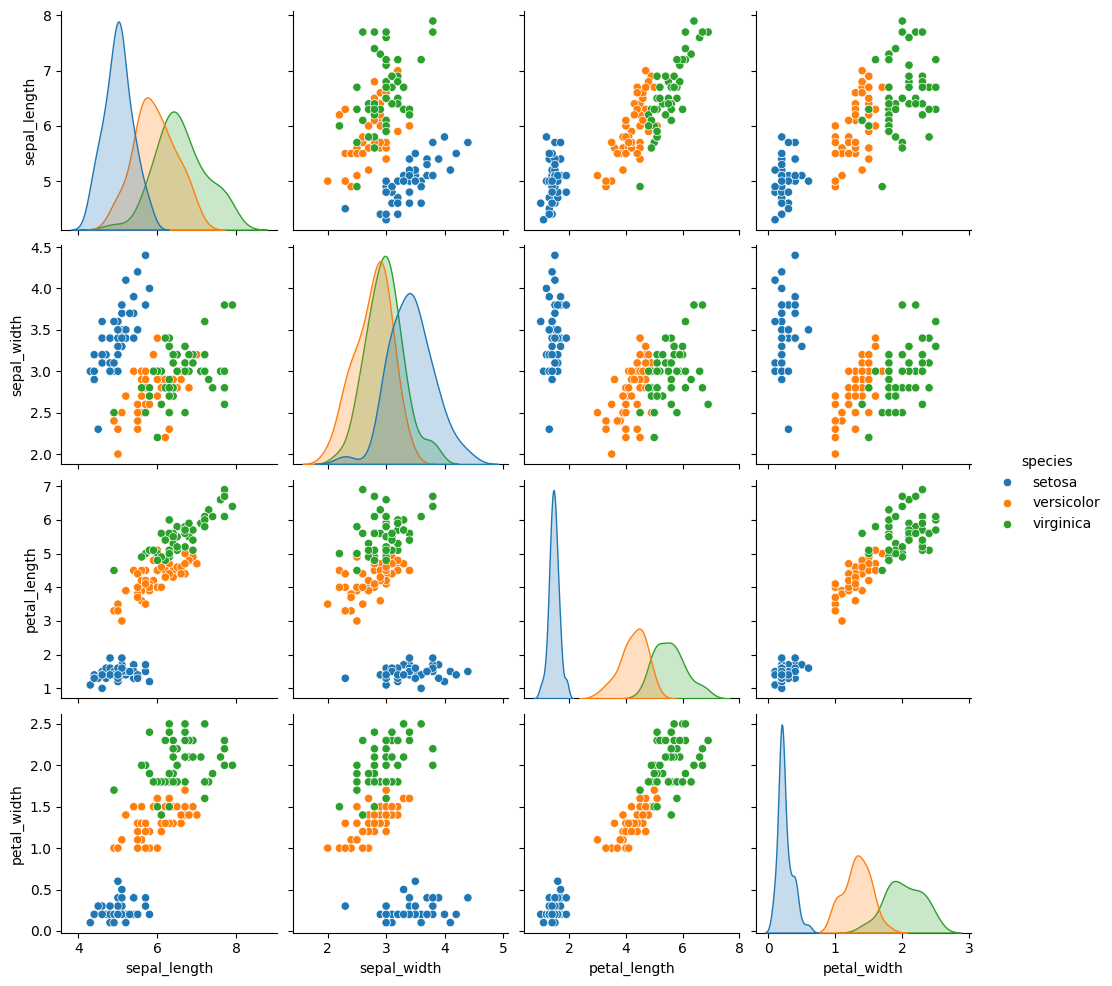

In [84]:
sns.pairplot(iris,hue="species")

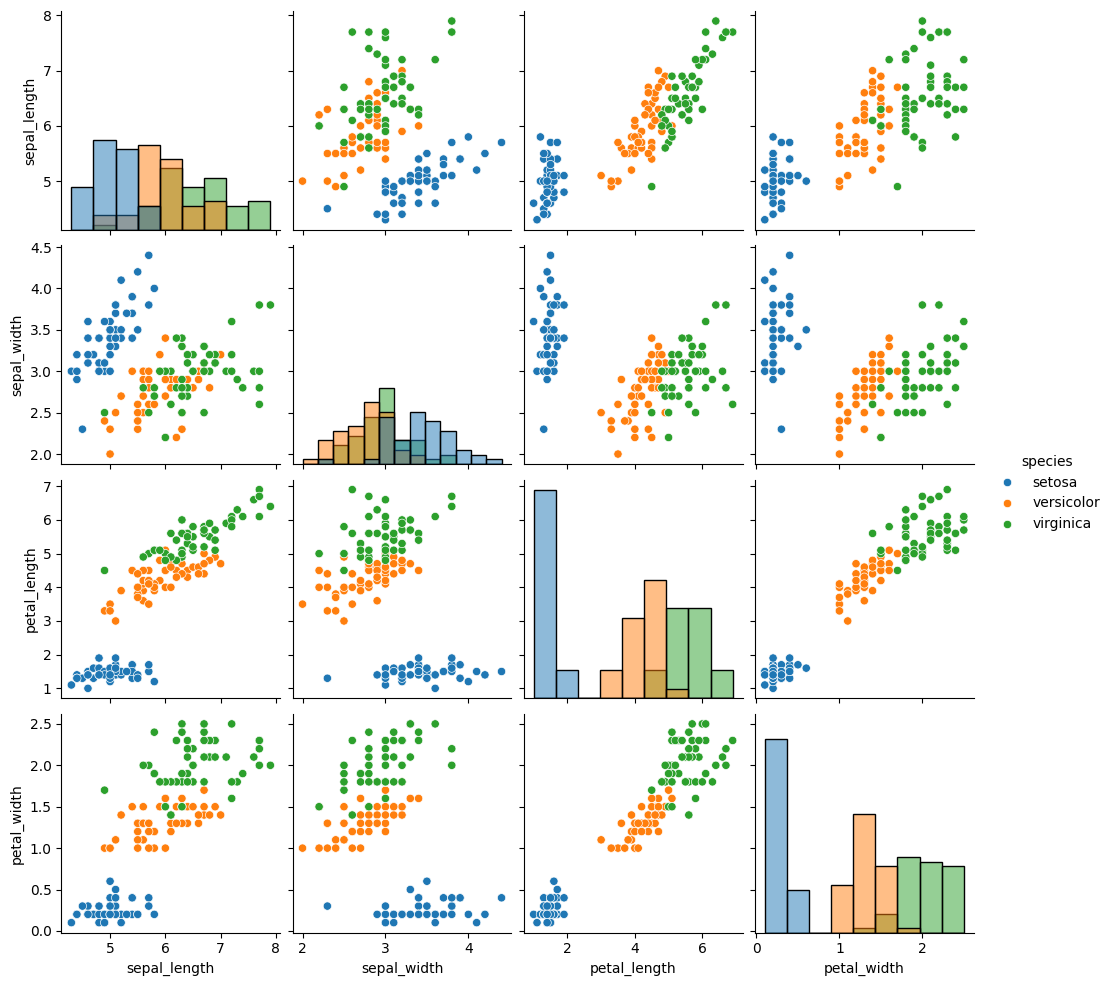

In [86]:
sns.pairplot(iris,hue="species",diag_kind="hist")

### PairGrid

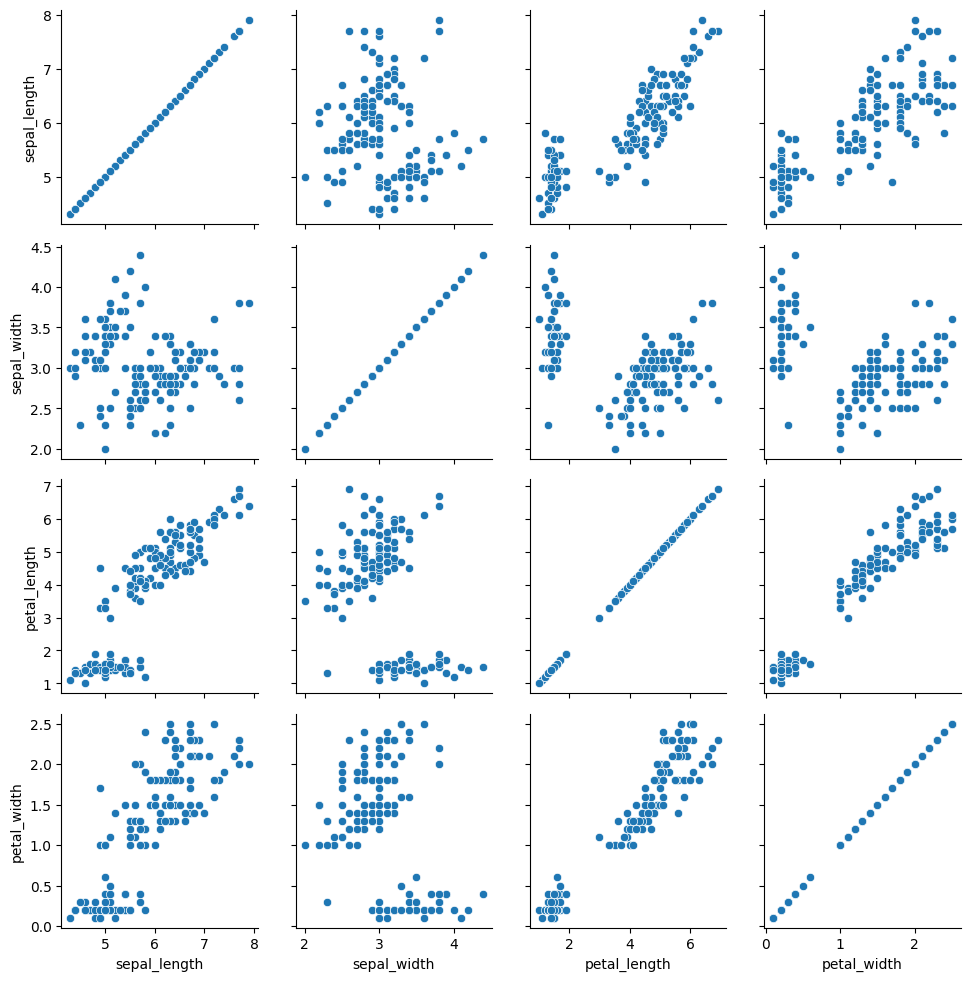

In [88]:
g = sns.PairGrid(iris)
g.map(sns.scatterplot)

#### g.map_diag() and g.map_offdiag()

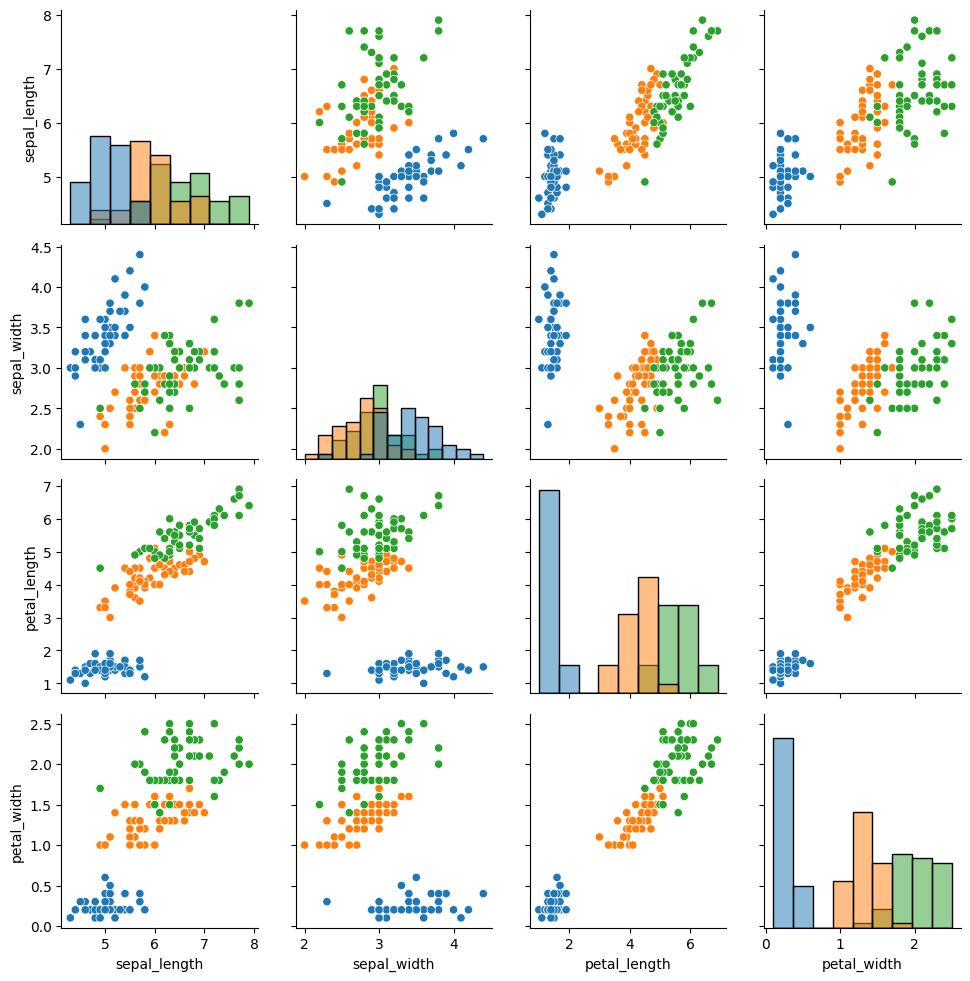

In [94]:
g = sns.PairGrid(iris,hue="species")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

#### g.map_upper() and g.map_lower()

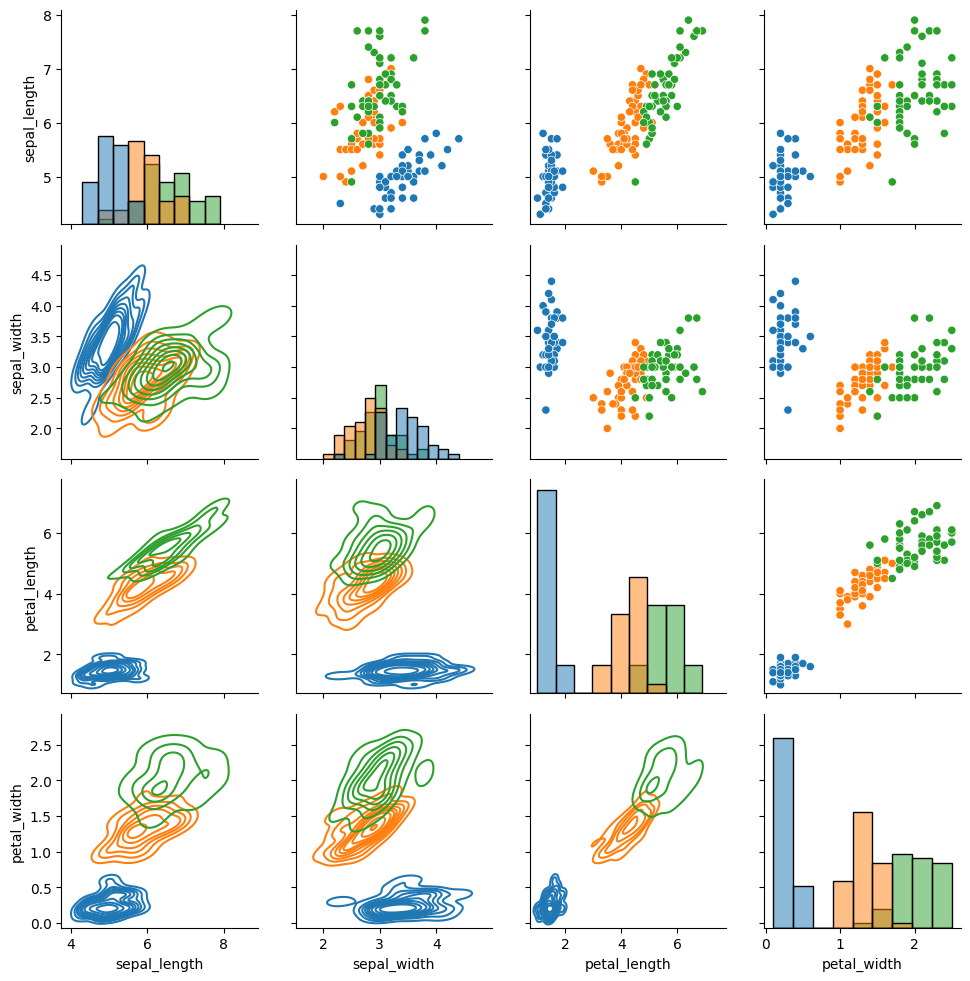

In [104]:
g = sns.PairGrid(iris,hue="species")
g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)

#### vars parameter

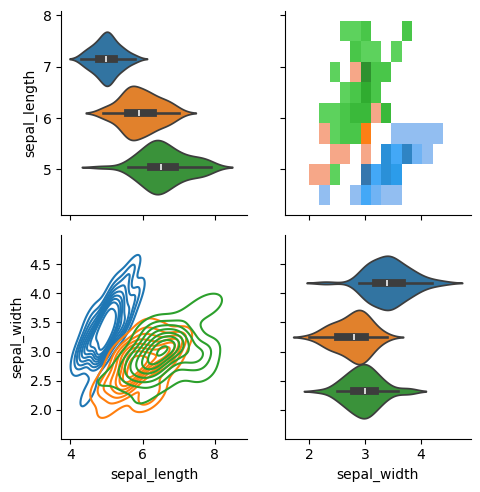

In [106]:
g = sns.PairGrid(iris,hue="species",vars=["sepal_length","sepal_width"])
g.map_diag(sns.violinplot)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot)

## JointGrid vs Jointplot
Both are used to create bivariate plots with marginal histograms, but they differ in complexity and flexibility.

### jointplot (High-level function)
* Simpler and quick to use.
* Good for common use cases.
* Automatically creates:
* Main bivariate plot (scatter, hex, KDE, etc.)
* Marginal plots (histograms or KDE) on the top and right.
* Less customizable.

**kind options:**
1. "scatter" (default)
2. "kde" – kernel density
3. "hist" – histogram
4. "hex" – hexbin
5. "reg" – regression

#### JointGrid (Low-level class)
* More customizable but more complex.
* You manually build the three plots: joint, marginal x, marginal y.
* Allows fine-tuned layout control, annotations, axis limits, etc.


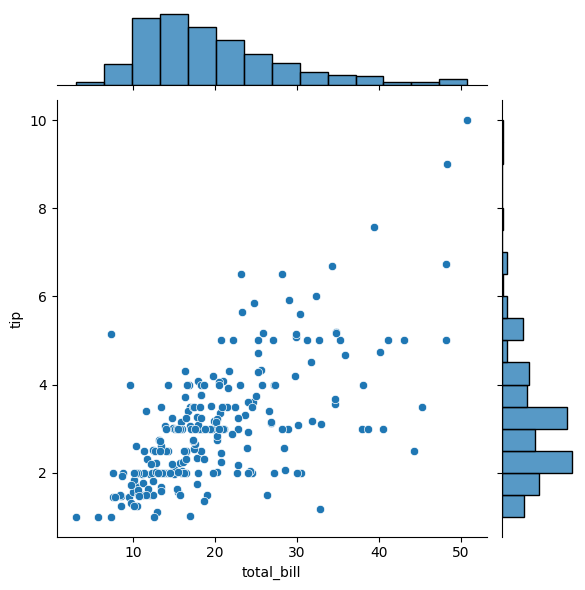

In [107]:
sns.jointplot(data=tips,x="total_bill",y="tip")

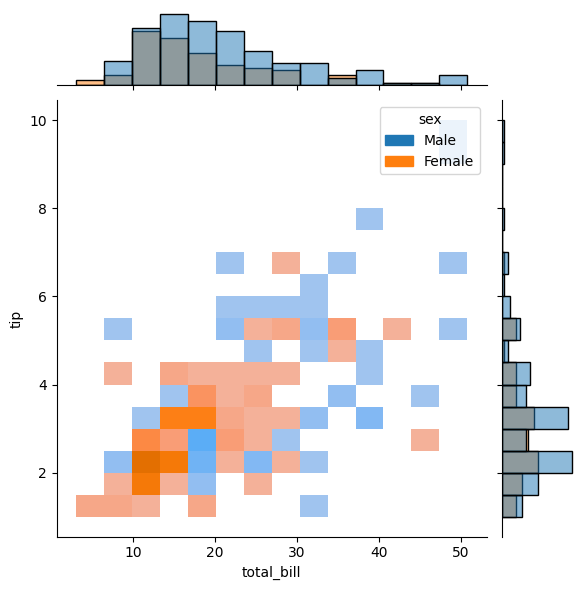

In [112]:
sns.jointplot(data=tips,x="total_bill",y="tip",hue="sex",kind="hist")

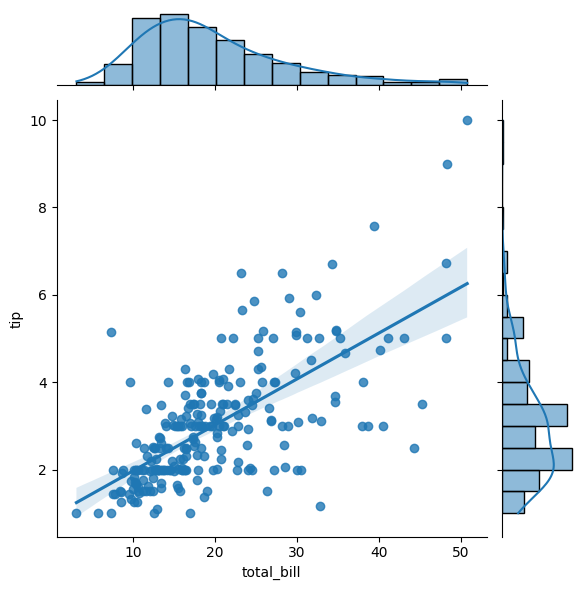

In [116]:
sns.jointplot(data=tips,x="total_bill",y="tip",kind="reg")

### JointGrid

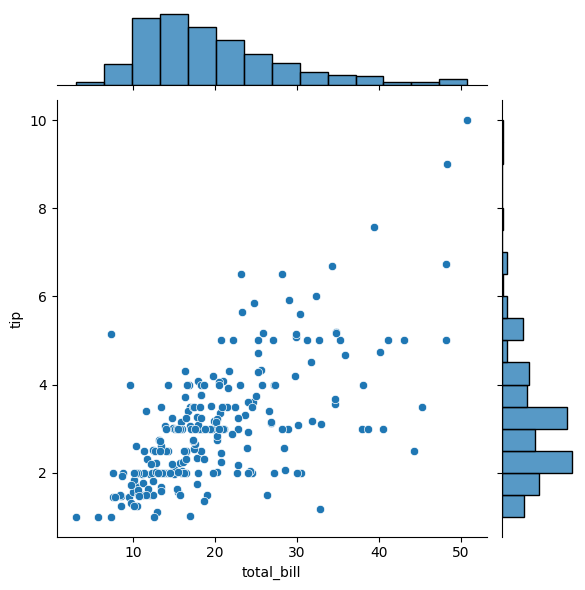

In [120]:
g = sns.JointGrid(data=tips,x="total_bill",y="tip")
g.plot(sns.scatterplot, sns.histplot)

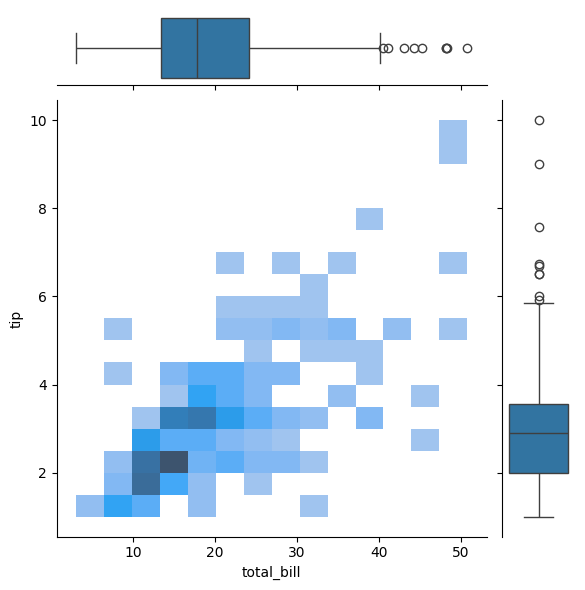

In [121]:
g = sns.JointGrid(data=tips,x="total_bill",y="tip")
g.plot(sns.histplot, sns.boxplot)

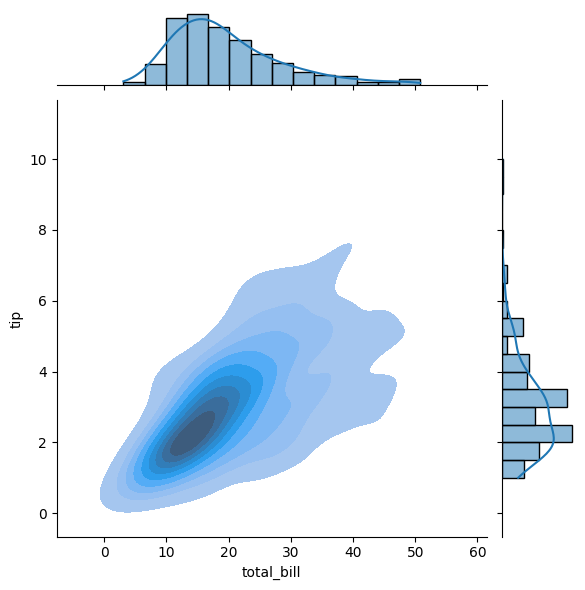

In [124]:
g = sns.JointGrid(data=tips,x="total_bill",y="tip")
g.plot_joint(sns.kdeplot,fill=True)
g.plot_marginals(sns.histplot,kde=True)

## Utility Functions

In [132]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [134]:
sns.load_dataset("glue")

,Model,Year,Encoder,Task,Score
0,ERNIE,2019,Transformer,CoLA,75.5
1,T5,2019,Transformer,CoLA,71.6
2,RoBERTa,2019,Transformer,CoLA,67.8
3,BERT,2018,Transformer,CoLA,60.5
4,BiLSTM+ELMo,2018,LSTM,CoLA,32.1
...,...,...,...,...,...
59,BERT,2018,Transformer,RTE,70.1
60,BiLSTM+ELMo,2018,LSTM,RTE,57.4
61,BiLSTM+CoVe,2017,LSTM,RTE,52.7
62,BiLSTM+Attn,2017,LSTM,RTE,58.4
